In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("ipl_matches.csv")

In [4]:
df.shape

(756, 18)

In [5]:
df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [6]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [8]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
df=df.drop(columns='umpire3',axis=1)

In [10]:
df[['umpire1','umpire2']].mode()

,umpire1,umpire2
0,HDPK Dharmasena,C Shamshuddin
1,NaN,S Ravi


In [11]:

df['umpire1'].fillna('HDPK Dharmasena',inplace=True)
df['umpire2'].fillna('C Shamshuddin',inplace=True)


In [12]:
df['city'].fillna('Unknown', inplace=True)
df[df['city']=='Unknown']

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,IPL-2014,Unknown,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,IPL-2014,Unknown,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,IPL-2014,Unknown,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,IPL-2014,Unknown,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,IPL-2014,Unknown,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,IPL-2014,Unknown,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,IPL-2014,Unknown,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [13]:
df['winner'].fillna('No Result', inplace=True)
df['player_of_match'].fillna('No Award', inplace=True)
df['city'].fillna('Sharjah',inplace=True)

In [14]:
df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

In [17]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")
df.dtypes


id                          int64
Season                     object
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
dtype: object

In [18]:
df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,IPL-2019,Chennai,2019-05-07,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,IPL-2019,Visakhapatnam,2019-05-08,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,HDPK Dharmasena,C Shamshuddin
754,11414,IPL-2019,Visakhapatnam,2019-05-10,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


<Axes: ylabel='win_by_wickets'>

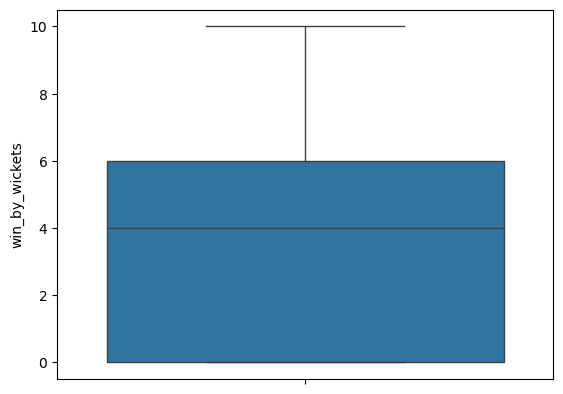

In [19]:
sns.boxplot(y=df['win_by_wickets'])

<Axes: ylabel='win_by_runs'>

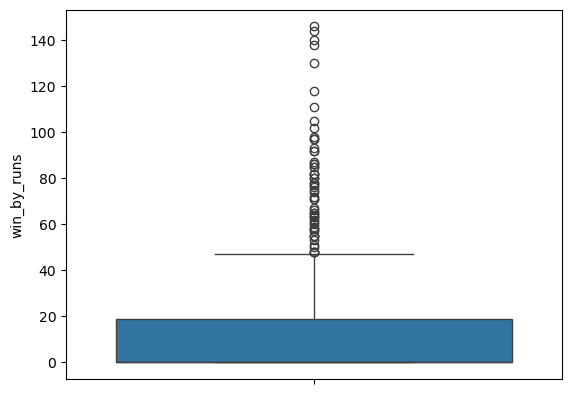

In [20]:
sns.boxplot(y=df['win_by_runs'])

# 	Exploratory Data Analysis (EDA)

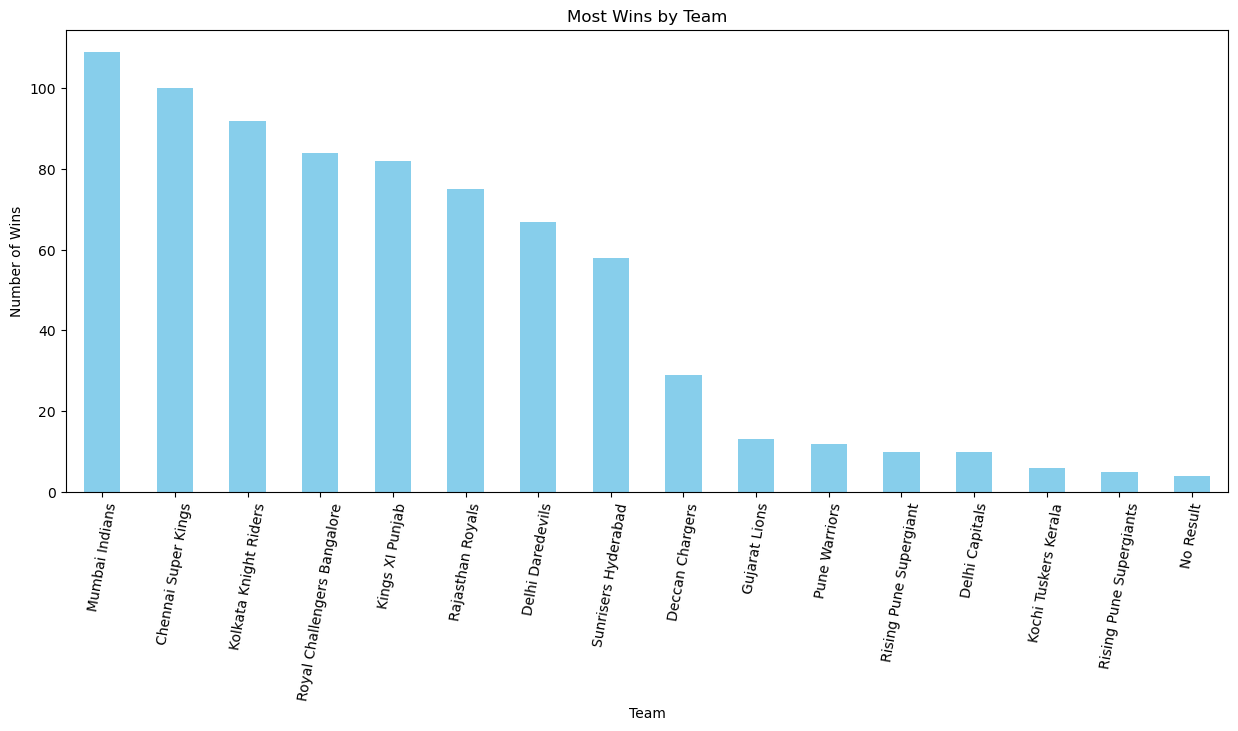

In [21]:

plt.figure(figsize=(15,6))
df['winner'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=80)
plt.show()


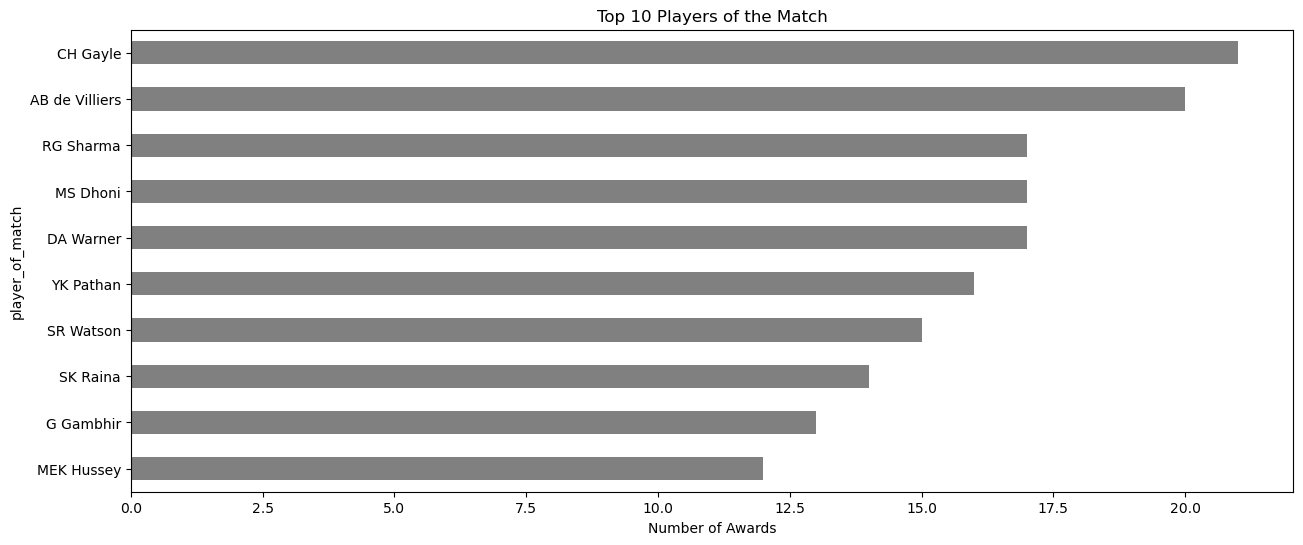

In [22]:
plt.figure(figsize=(15,6))
df['player_of_match'].value_counts().head(10).plot(kind='barh', color='gray')
plt.title('Top 10 Players of the Match')
plt.xlabel('Number of Awards')
plt.gca().invert_yaxis()
plt.show()

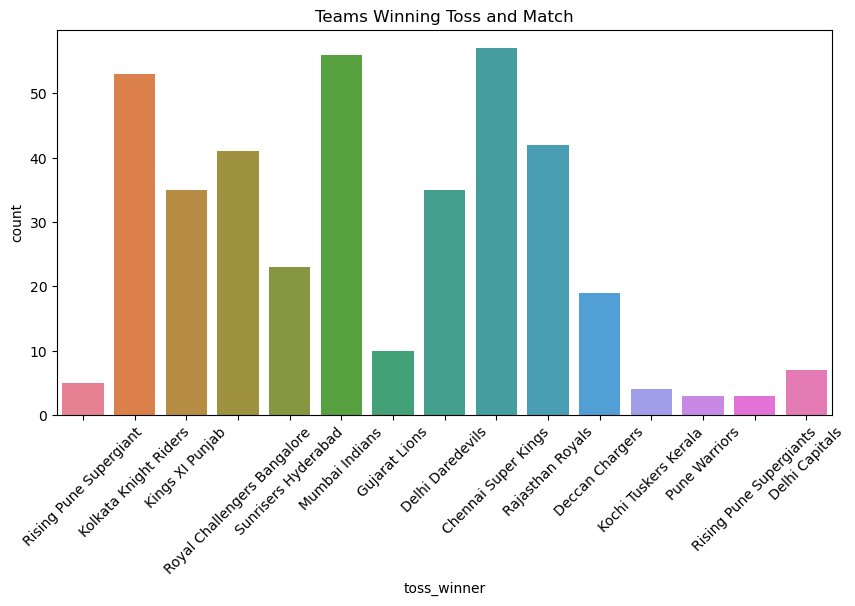

In [23]:








plt.figure(figsize=(10,5))
sns.countplot(x='toss_winner', hue='winner', data=df[df['toss_winner'] == df['winner']])
plt.xticks(rotation=45)
plt.title('Teams Winning Toss and Match')
plt.show()


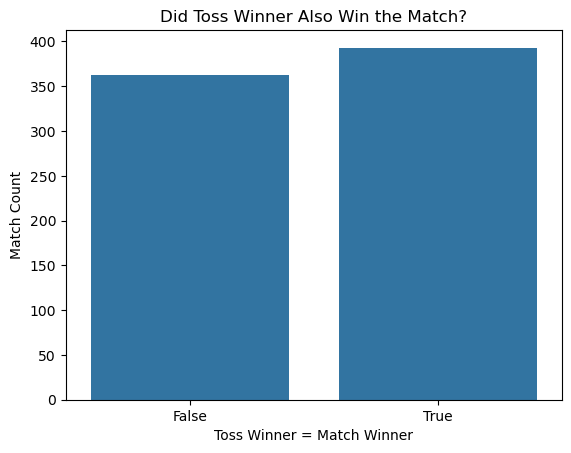

In [24]:
df['toss_match_win'] = df['toss_winner'] == df['winner']
sns.countplot(x='toss_match_win', data=df)
plt.title('Did Toss Winner Also Win the Match?')
plt.xlabel('Toss Winner = Match Winner')
plt.ylabel('Match Count')
plt.show()

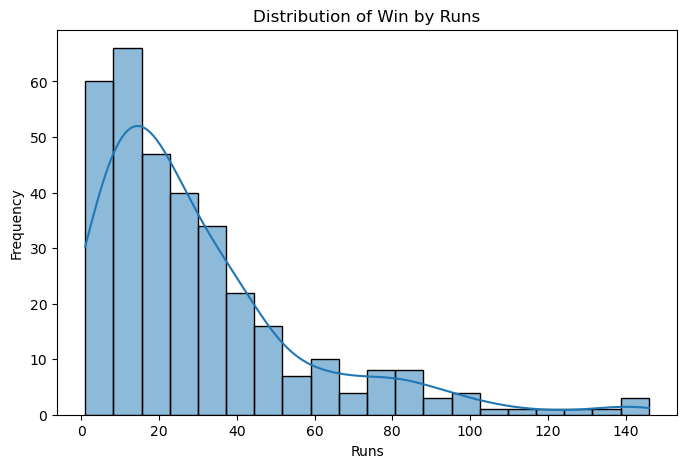

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['win_by_runs'] > 0]['win_by_runs'], bins=20, kde=True)
plt.title('Distribution of Win by Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

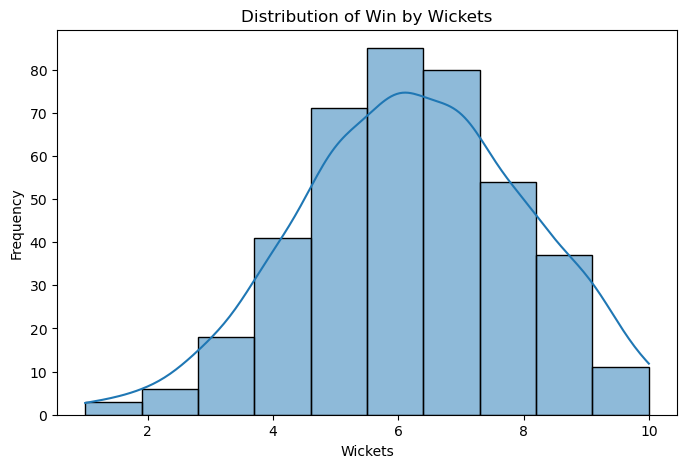

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['win_by_wickets'] > 0]['win_by_wickets'], bins=10, kde=True)
plt.title('Distribution of Win by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

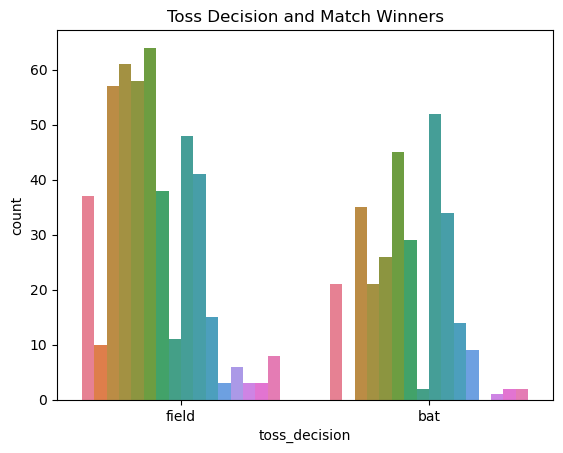

In [27]:
sns.countplot(x='toss_decision', hue='winner', data=df)
plt.title('Toss Decision and Match Winners')
plt.xticks(rotation=0)
plt.legend([],[], frameon=False) 
plt.show()

#  	Data Preprocessing

In [28]:
features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue']
X = df[features]
Y = df['winner']

In [29]:
X_scaler = OneHotEncoder()
X_scaled = X_scaler.fit_transform(X)
Y_scaler = LabelEncoder()
Y_scaled = Y_scaler.fit_transform(Y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.20, random_state=42)

# 	Model Training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# XG BOOSTING

In [32]:
x_model=XGBClassifier(n_estimators=250,reg_lambda=0.1)

In [33]:
x_model.fit(X_train,y_train)

y_train_pred = x_model.predict(X_train)
y_test_pred = x_model.predict(X_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        74
           1       0.95      0.86      0.90        22
           2       1.00      1.00      1.00         9
           3       0.90      0.81      0.85        58
           4       0.89      0.89      0.89         9
           5       0.93      0.82      0.87        65
           6       1.00      1.00      1.00         6
           7       0.92      0.86      0.89        70
           8       0.86      0.92      0.89        90
           9       1.00      0.50      0.67         4
          10       1.00      1.00      1.00         8
          11       0.80      0.92      0.85        61
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         2
          14       0.78      0.86      0.82        72
          15       0.93      0.91      0.92        46

    accuracy                           0.89       604
   macro avg       0.93   

# GradientBoosting

In [34]:
g_model=GradientBoostingClassifier()

In [35]:
g_model.fit(X_train,y_train)
y_train_pred = g_model.predict(X_train)
y_test_pred = g_model.predict(X_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        74
           1       0.95      0.95      0.95        22
           2       1.00      1.00      1.00         9
           3       0.92      0.78      0.84        58
           4       0.89      0.89      0.89         9
           5       0.93      0.82      0.87        65
           6       1.00      1.00      1.00         6
           7       0.91      0.87      0.89        70
           8       0.82      0.99      0.89        90
           9       0.75      0.75      0.75         4
          10       1.00      1.00      1.00         8
          11       0.86      0.84      0.85        61
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         2
          14       0.78      0.86      0.82        72
          15       0.95      0.89      0.92        46

    accuracy                           0.89       604
   macro avg       0.92   

# DecisionTree

In [36]:
model=DecisionTreeClassifier()

In [37]:
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        74
           1       0.92      1.00      0.96        22
           2       1.00      1.00      1.00         9
           3       0.84      0.90      0.87        58
           4       0.89      0.89      0.89         9
           5       0.86      0.91      0.88        65
           6       1.00      1.00      1.00         6
           7       0.90      0.89      0.89        70
           8       0.88      0.89      0.88        90
           9       0.75      0.75      0.75         4
          10       1.00      1.00      1.00         8
          11       0.89      0.80      0.84        61
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         2
          14       0.84      0.78      0.81        72
          15       0.98      0.87      0.92        46

    accuracy                           0.89       604
   macro avg       0.92   

# RandomForest

In [38]:
rf_model=RandomForestClassifier()

In [39]:
rf_model.fit(X_train,y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        74
           1       0.95      0.95      0.95        22
           2       1.00      1.00      1.00         9
           3       0.89      0.83      0.86        58
           4       1.00      0.78      0.88         9
           5       0.89      0.86      0.88        65
           6       1.00      1.00      1.00         6
           7       0.92      0.86      0.89        70
           8       0.84      0.94      0.89        90
           9       1.00      0.50      0.67         4
          10       1.00      1.00      1.00         8
          11       0.80      0.93      0.86        61
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         2
          14       0.82      0.81      0.81        72
          15       0.98      0.87      0.92        46

    accuracy                           0.89       604
   macro avg       0.94   

# svm

In [40]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.85      0.82      0.84        74
           1       0.70      0.86      0.78        22
           2       1.00      0.78      0.88         9
           3       0.81      0.74      0.77        58
           4       0.78      0.78      0.78         9
           5       0.83      0.69      0.76        65
           6       1.00      0.83      0.91         6
           7       0.80      0.86      0.83        70
           8       0.74      0.90      0.81        90
           9       0.00      0.00      0.00         4
          10       1.00      0.38      0.55         8
          11       0.79      0.80      0.80        61
          12       0.83      0.62      0.71         8
          13       1.00      1.00      1.00         2
          14       0.74      0.74      0.74        72
          15       0.83      0.85      0.84        46

    accuracy                           0.79       604
   macro avg       0.79   

# KNN

In [41]:
kn_model=KNeighborsClassifier()
kn_model.fit(X_train,y_train)
y_train_pred = kn_model.predict(X_train)
y_test_pred = kn_model.predict(X_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.64      0.77      0.70        74
           1       0.62      0.73      0.67        22
           2       0.71      0.56      0.62         9
           3       0.69      0.60      0.64        58
           4       0.67      0.44      0.53         9
           5       0.65      0.60      0.62        65
           6       1.00      0.83      0.91         6
           7       0.71      0.74      0.73        70
           8       0.68      0.79      0.73        90
           9       0.50      0.50      0.50         4
          10       1.00      0.38      0.55         8
          11       0.69      0.70      0.70        61
          12       0.83      0.62      0.71         8
          13       1.00      1.00      1.00         2
          14       0.64      0.61      0.62        72
          15       0.76      0.61      0.67        46

    accuracy                           0.68       604
   macro avg       0.74   

# naviey_bayes

In [42]:
bayes_model=MultinomialNB()
bayes_model.fit(X_train,y_train)
y_train_pred = bayes_model.predict(X_train)
y_test_pred = bayes_model.predict(X_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.69      0.73      0.71        74
           1       0.57      0.73      0.64        22
           2       1.00      0.67      0.80         9
           3       0.56      0.60      0.58        58
           4       0.75      0.67      0.71         9
           5       0.71      0.55      0.62        65
           6       1.00      0.50      0.67         6
           7       0.64      0.79      0.71        70
           8       0.69      0.68      0.68        90
           9       0.00      0.00      0.00         4
          10       1.00      0.25      0.40         8
          11       0.67      0.70      0.69        61
          12       0.80      0.50      0.62         8
          13       1.00      0.50      0.67         2
          14       0.64      0.68      0.66        72
          15       0.74      0.70      0.72        46

    accuracy                           0.67       604
   macro avg       0.72   

# LOGISTIC REGRATION

In [43]:
l_model=LogisticRegression()
l_model.fit(X_train,y_train)
y_train_pred = l_model.predict(X_train)
y_test_pred = l_model.predict(X_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.79      0.88      0.83        74
           1       0.84      0.73      0.78        22
           2       1.00      0.78      0.88         9
           3       0.80      0.69      0.74        58
           4       0.83      0.56      0.67         9
           5       0.77      0.77      0.77        65
           6       1.00      0.83      0.91         6
           7       0.83      0.83      0.83        70
           8       0.75      0.89      0.81        90
           9       0.00      0.00      0.00         4
          10       1.00      0.25      0.40         8
          11       0.73      0.80      0.77        61
          12       1.00      0.62      0.77         8
          13       1.00      1.00      1.00         2
          14       0.71      0.71      0.71        72
          15       0.82      0.80      0.81        46

    accuracy                           0.78       604
   macro avg       0.80   

# 	Hyperparameter Tuning

In [44]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resample, Y_train_resample = smote.fit_resample(X_train, y_train)
X_train,X_test,Y_train,Y_test = train_test_split(X_train_resample,Y_train_resample,test_size=0.20,random_state=42)

# LOGISTIC REGRATION

In [45]:
log_params = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [200, 500, 1000]
}

In [46]:
grid_model_log = GridSearchCV(estimator=l_model,param_grid=log_params,cv=5,scoring='f1_weighted',verbose=2,n_jobs=-1)

In [47]:
grid_model_log.fit(X_train,Y_train)
y_train_pred=grid_model_log.predict(X_train)
y_test_pred = grid_model_log.predict(X_test)

print(classification_report(Y_train,y_train_pred))
print(classification_report(Y_test,y_test_pred))



Fitting 5 folds for each of 42 candidates, totalling 210 fits
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        74
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        72
           3       0.89      0.93      0.91        72
           4       0.99      1.00      0.99        76
           5       0.82      0.85      0.84        66
           6       1.00      1.00      1.00        66
           7       0.86      0.88      0.87        73
           8       0.82      0.89      0.86        74
           9       0.96      1.00      0.98        74
          10       1.00      1.00      1.00        71
          11       0.87      0.88      0.88        77
          12       1.00      1.00      1.00        73
          13       1.00      1.00      1.00        75
          14       0.93      0.69      0.79        74
          15       0.94      0.93      0.93        68

    accuracy      

In [63]:
grid_model_log.fit(X_train,Y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [200, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1_weighted', verbose=2)

#  Decision Tree

In [48]:
DecisionTree_params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]
    }

In [49]:
grid_dt = GridSearchCV(estimator=model,param_grid=DecisionTree_params,cv=5,scoring='accuracy',verbose=2,n_jobs=-1)

In [50]:
grid_dt.fit(X_train, Y_train)
y_train_pred=grid_dt.predict(X_train)
y_test_pred = grid_dt.predict(X_test)

print(classification_report(Y_train,y_train_pred))
print(classification_report(Y_test,y_test_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        74
           1       1.00      1.00      1.00        67
           2       1.00      0.97      0.99        72
           3       0.83      0.94      0.88        72
           4       0.99      1.00      0.99        76
           5       0.79      0.50      0.61        66
           6       1.00      1.00      1.00        66
           7       0.88      0.93      0.91        73
           8       0.58      0.81      0.68        74
           9       0.99      0.99      0.99        74
          10       1.00      0.97      0.99        71
          11       0.92      0.78      0.85        77
          12       1.00      1.00      1.00        73
          13       1.00      1.00      1.00        75
          14       0.93      0.74      0.83        74
          15       0.98      0.91      0.95        68

    accuracy      

# GradientBoosting

In [51]:
gparam_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],}

In [52]:
GBoost_random=RandomizedSearchCV(estimator=g_model,param_distributions=gparam_grid,n_iter=20,        
cv=5,scoring='accuracy',n_jobs=-1,verbose=2,random_state=42)

In [53]:
GBoost_random.fit(X_train, Y_train)
y_train_pred=GBoost_random.predict(X_train)
y_test_pred = GBoost_random.predict(X_test)

print(classification_report(Y_train,y_train_pred))
print(classification_report(Y_test,y_test_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        74
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        72
           3       0.90      0.96      0.93        72
           4       0.99      1.00      0.99        76
           5       0.90      0.91      0.90        66
           6       1.00      1.00      1.00        66
           7       0.93      0.90      0.92        73
           8       0.86      0.92      0.89        74
           9       0.99      0.99      0.99        74
          10       1.00      1.00      1.00        71
          11       0.90      0.90      0.90        77
          12       1.00      1.00      1.00        73
          13       1.00      1.00      1.00        75
          14       0.91      0.80      0.85        74
          15       0.97      0.93      0.95        68

    accuracy      

# navie_bayes

In [54]:
Nparam_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]}


In [55]:
grid_bayes = GridSearchCV(estimator=bayes_model,param_grid=Nparam_grid,cv=5,scoring='accuracy',verbose=2,n_jobs=-1)

In [56]:
grid_bayes.fit(X_train, Y_train)
y_train_pred=grid_bayes.predict(X_train)
y_test_pred =grid_bayes.predict(X_test)

print(classification_report(Y_train,y_train_pred))
print(classification_report(Y_test,y_test_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.80      0.77      0.79        74
           1       0.82      1.00      0.90        67
           2       0.96      0.97      0.97        72
           3       0.66      0.71      0.68        72
           4       0.95      0.96      0.95        76
           5       0.80      0.61      0.69        66
           6       0.94      1.00      0.97        66
           7       0.74      0.79      0.77        73
           8       0.64      0.66      0.65        74
           9       0.91      0.95      0.93        74
          10       0.89      0.89      0.89        71
          11       0.83      0.77      0.80        77
          12       0.94      1.00      0.97        73
          13       1.00      1.00      1.00        75
          14       0.77      0.58      0.66        74
          15       0.81      0.82      0.82        68

    accuracy       

# RANDOM FOREST

In [57]:
RandomForest={'n_estimators': [100, 200],'max_depth': [10, 20, None],'min_samples_split': [2, 4],'min_samples_leaf': [1, 2],
'bootstrap': [True]}

In [58]:
RF_random = GridSearchCV(estimator=rf_model,param_grid=RandomForest,cv=5,scoring='accuracy',verbose=2,n_jobs=-1)

In [59]:
RF_random.fit(X_train, Y_train)
y_train_pred=RF_random.predict(X_train)
y_test_pred =RF_random.predict(X_test)

print(classification_report(Y_train,y_train_pred))
print(classification_report(Y_test,y_test_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        74
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        72
           3       0.88      0.96      0.92        72
           4       0.99      1.00      0.99        76
           5       0.89      0.88      0.89        66
           6       1.00      1.00      1.00        66
           7       0.88      0.95      0.91        73
           8       0.84      0.91      0.87        74
           9       1.00      0.97      0.99        74
          10       1.00      0.99      0.99        71
          11       0.91      0.87      0.89        77
          12       1.00      1.00      1.00        73
          13       1.00      1.00      1.00        75
          14       0.89      0.78      0.83        74
          15       0.98      0.91      0.95        68

    accuracy      

# XGBOOSTING

In [60]:
XGBoost_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2]
}

In [61]:
XG_random= RandomizedSearchCV(estimator=x_model,param_distributions=XGBoost_params,n_iter=20,        
cv=5,scoring='accuracy',n_jobs=-1,verbose=2,random_state=42)

In [62]:
XG_random.fit(X_train_resample, Y_train_resample)
y_train_pred=XG_random.predict(X_train)
y_test_pred = XG_random.predict(X_test)

print(classification_report(Y_train,y_train_pred))
print(classification_report(Y_test,y_test_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        74
           1       0.98      0.97      0.98        67
           2       1.00      1.00      1.00        72
           3       0.90      0.85      0.87        72
           4       0.97      0.99      0.98        76
           5       0.82      0.80      0.81        66
           6       1.00      1.00      1.00        66
           7       0.89      0.89      0.89        73
           8       0.80      0.85      0.82        74
           9       1.00      0.96      0.98        74
          10       1.00      0.99      0.99        71
          11       0.83      0.88      0.86        77
          12       0.99      1.00      0.99        73
          13       1.00      1.00      1.00        75
          14       0.86      0.74      0.80        74
          15       0.90      0.94      0.92        68

    accuracy      

# conclustion

Feature Engineering:
Creating new meaningful features (e.g., team strength, home ground advantage, recent performance metrics) could capture complex patterns better.

Advanced Models:
Try more powerful models like:

XGBoost or LightGBM

Stacking Ensemble

Neural Networks (if sufficient data is available)

Hyperparameter Optimization:
Use Bayesian optimization (e.g., with Optuna) instead of traditional GridSearch for more efficient tuning.

Handling Class Imbalance:
Use techniques like:

SMOTE (Synthetic Minority Oversampling)

Class weights adjustment

Undersampling majority class

Cross-Validation:
Instead of a single train-test split, use k-fold cross-validation to ensure robustness and generalizability.

